In [145]:
import time
from selenium.webdriver.common.keys import Keys
from bs4 import BeautifulSoup
import undetected_chromedriver as uc
import pandas as pd
import re
from konlpy.tag import Okt
from collections import Counter
import matplotlib.pyplot as plt
import koreanize_matplotlib
from wordcloud import WordCloud


import warnings
warnings.filterwarnings("ignore")

## 대구은행 크롤링

In [57]:
driver = uc.Chrome()

box = []

while len(box) < 100:
    driver.get("https://search.naver.com/search.naver?sm=tab_hty.top&where=news&ssc=tab.news.all&query=%EB%8C%80%EA%B5%AC%EC%9D%80%ED%96%89&oquery=%ED%95%98%EB%82%98%EC%9D%80%ED%96%89&tqi=iwyX2wqo1awssC%2F7VpRsssssshR-233781")
    time.sleep(2)

    body = driver.find_element(By.CSS_SELECTOR, "body")
    for _ in range(10): 
        body.send_keys(Keys.PAGE_DOWN)
        time.sleep(2)

    html = BeautifulSoup(driver.page_source)
    
    articles = html.select("li.bx")  
    
    for article in articles:
        if len(box) >= 100:
            break

        try:
            title_element = article.select_one("a.news_tit")
            description_element = article.select_one("div.news_dsc")

            if title_element and description_element:
                title = title_element.text 
                description = description_element.text  

                box.append({
                    "제목": title,
                    "내용": description
                })
        except Exception as e:
            print(f"뉴스 정보를 가져오는 중 오류 발생: {e}")

In [59]:
컬럼명 = ["제목", "내용"]
df_d = pd.DataFrame(box, columns=컬럼명)

df_d

,제목,내용
0,"대구근대역사관, 조선은행 대구지점 폭파 시도 장진홍 의사 발자취 답사",이종암은 대구은행에 재직하다가 만주로 망명해 1919년 김원봉과 의열단을 조직한...
1,'달빛동맹' 광주-대구 금융분야로 확대…초광역경제 힘 보태는 광주은행,"협약식은 고병일 광주은행장, 황병우 iM뱅크(옛 DGB대구은행) 은행장, 김귀남..."
2,"iM뱅크, 창립57주년 기념 5000만원 상당 경품증정 이벤트",DGB대구은행에서 시중은행 올해 전환 최초자산연결후 다양한 금융서비스 진행시 인...
3,"iM뱅크 창립 57주년···황병우 ""차별화 지속하겠다""",아주경제=박성준 기자 psj@ajunews.com 황병우 iM뱅크(옛 대구은행)...
4,"대구시, ‘악취 민원’ 은행 열매 채취",대구시가 악취 민원이 잦은 은행 열매 채취에 나섭니다. 7개 구·군에서 진동수확...
...,...,...
95,[오늘의 예금] 6월 첫째주 기준 최고 금리 주는 예금상품은? 대구은행 ‘...,"3일 금융감독원 금융상품통합비교공시 ‘금융상품한눈에’에 따르면, 대구은행의 ‘D..."
96,"""시중은행 대구은행 'iM뱅크'로 새출발"".. 대구은행 진영수 상무",● 출연 : 대구은행 진영수 상무 ● 코너명 : BBS 대구불교방송 '라디오 아...
97,"전국구 도약 대구은행, 마케팅 총력…'연 20% 적금'",DGB대구은행…iM뱅크 변신 앞두고 마케팅 총력전 시중은행 전환 인가를 획득하고...
98,"대구은행, 기업·주주가치 높이기 본격화",DGB금융그룹이 대구은행의 시중은행 전환을 계기로 책임경영 강화와 주주가치 제고...


## 하나은행 크롤링

In [38]:
driver = uc.Chrome()

news_data = []

while len(news_data) < 100:
    driver.get("https://search.naver.com/search.naver?sm=tab_hty.top&where=news&ssc=tab.news.all&query=%ED%95%98%EB%82%98%EC%9D%80%ED%96%89&oquery=%EB%8C%80%EA%B5%AC%EC%9D%80%ED%96%89&tqi=iwyW9dqVOsVssTcmA2ZssssssAo-197333")
    time.sleep(2)

    body = driver.find_element(By.CSS_SELECTOR, "body")
    for _ in range(10): 
        body.send_keys(Keys.PAGE_DOWN)
        time.sleep(2)

    html = BeautifulSoup(driver.page_source)
    
    articles = html.select("li.bx")  
    
    for article in articles:
        if len(news_data) >= 100:
            break

        try:
            title_element = article.select_one("a.news_tit")
            description_element = article.select_one("div.news_dsc")

            if title_element and description_element:
                title = title_element.text 
                description = description_element.text  

                # 중복된 제목 확인 없이 바로 데이터 추가
                news_data.append({
                    "제목": title,
                    "내용": description
                })
        except Exception as e:
            print(f"뉴스 정보를 가져오는 중 오류 발생: {e}")

In [42]:
컬럼명 = ["제목", "내용"]
df_h = pd.DataFrame(news_data, columns=컬럼명)

df_h

,제목,내용
0,"하나은행, 임영웅과 대전서 자선축구대회 열어",하나은행은 하나금융그룹의 광고모델인 가수 임영웅과 사회취약계층 지원을 위한 자선...
1,"하나은행, 제32회 자연사랑 어린이 미술대회 시상식 개최",이투데이=손희정 기자 | 하나은행은 인천 청라에 있는 하나글로벌캠퍼스에서 ‘제3...
2,"“우리 모두는 단 하나의 초록별 탐험가”..하나은행, 어린이 미술대회...",하나은행이 지난 12일 인천 청라 하나글로벌캠퍼스에서 제 32회 자연사랑 어린이...
3,"하나은행, 임영웅과 '자선축구대회'…3만5000여명 구름관중 몰려",하나은행은 하나금융그룹 광고모델인 가수 임영웅과 함께 사회취약계층 지원을 위해 ...
4,"하나은행, 제 32회 자연사랑 어린이 미술대회 본선 및 시상식 개최 ""초록...",하나은행은 지난 12일 인천 청라에 위치한 '하나글로벌캠퍼스'에서 「제 32회 ...
...,...,...
95,"쿠팡플레이, 임영웅과 함께하는 하나은행 자선축구대회 개최",'축구선수' 임영웅과 '아티스트' 임영웅의 매력을 한자리에서 만날 수 있는 '쿠...
96,"하나은행, AI기술을 통한 ‘기술력 기반 ML모형’ 개발",하나은행은 하나금융융합기술원 ‘Data Modelling Cell’과 함께 은행...
97,하나은행·인천국제공항공사 '스마트패스 활성화' MOU,사진/하나은행 하나은행이 11일 인천국제공항공사와 안면인식 출국 서비스인 '스마...
98,"하나은행, 패밀리오피스 자산관리 사업 강화",하나은행은 지난 10일 서울 삼성동 Place1에서 법무법인 율촌과 '패밀리오피...


## 전처리

In [83]:
stopwords = ['의', '가', '이', '은', '들', '에', '과', '도', '를', '으로', '하다', '로', '을', '에서', '위해', '랑']

def preprocess_text(text):
    text = re.sub(r"[^ㄱ-ㅎㅏ-ㅣ가-힣\s]", "", text)
    
    okt = Okt()
    nouns = okt.nouns(text)
    tokens = [word for word in nouns if word not in stopwords and len(word) >= 2]
    
    return " ".join(tokens)

In [85]:
df_d['제목_전처리'] = df_d['제목'].apply(preprocess_text)
df_d['내용_전처리'] = df_d['내용'].apply(preprocess_text)

df_h['제목_전처리'] = df_h['제목'].apply(preprocess_text)
df_h['내용_전처리'] = df_h['내용'].apply(preprocess_text)

In [95]:
df_d[['제목_전처리', '내용_전처리']]

,제목_전처리,내용_전처리
0,대구 근대역사관 조선 은행 대구 지점 폭파 시도 장진홍 의사 발자취 답사,이종 은행 재직 만주 망명 김원봉 의열단 조직 인물 군자금 모집 대구 경찰 징역 선...
1,달빛 동맹 광주 대구 금융 분야 확대 광역 경제 보태 광주 은행,협약 병일 광주 은행 황병우 뱅크 대구 은행 은행 광주 신용 보증 재단 이사장 박진...
2,뱅크 창립 주년 기념 만원 상당 경품 증정 이벤트,은행 시중 은행 올해 전환 최초 자산 결후 금융 서비스 진행 인더 뉴스 문승현 기자...
3,뱅크 창립 주년 황병우 차별 지속,아주경제 박성준 기자 황병우 뱅크 대구 은행 은행 과감 변화 창의 사고 차별 진행 ...
4,대구시 악취 민원 은행 열매 채취,대구시 악취 민원 은행 열매 채취 구군 진동수 확장 활용 열매 악취 나기 처리 계획...
...,...,...
95,오늘 예금 기준 최고 금리 예금 상품 대구 은행,금융감독원 금융 상품 통합 비교 공시 금융 상품 한눈 은행 예금 상품 최고 우대금리...
96,시중 은행 대구 은행 뱅크 출발 대구 은행 진영수 상무,출연 대구 은행 진영수 상무 코너 대구 불교 방송 라디오 아침 세상 대구 안동 포항...
97,전국구 도약 대구 은행 마케팅 총력 적금,대구 은행 뱅크 변신 마케팅 총력전 시중 은행 전환 획득 뱅크 출발 준비 은행 전국...
98,대구 은행 기업 주주 가치 본격,금융 그룹 은행 시중 은행 전환 계기 책임 경영 강화 주주 가치 본격 금융 그룹 미...


In [97]:
df_h[['제목_전처리', '내용_전처리']]

,제목_전처리,내용_전처리
0,하나은행 임영웅 대전 자선 축구 대회,하나은행 하나 금융 그룹 광고 모델 가수 임영웅 사회 취약 계층 지원 자선 축구 대...
1,하나은행 자연사 어린이 미술 대회 시상식 개최,이투데이 손희정 기자 하나은행 인천 청라 하나 글로벌 캠퍼스 자연사 어린이 미술 대...
2,우리 모두 하나 초록 탐험가 하나은행 어린이 미술 대회,하나은행 지난 인천 청라 하나 글로벌 캠퍼스 자연사 어린이 미술 대회 본선 시상식 ...
3,하나은행 임영웅 자선 축구 대회 여명 구름 관중,하나은행 하나 금융 그룹 광고 모델 가수 임영웅 사회 취약 계층 지원 개최 하나은행...
4,하나은행 자연사 어린이 미술 대회 본선 시상식 개최 초록,하나은행 지난 인천 청라 위치 하나 글로벌 캠퍼스 자연사 어린이 미술 대회 본선 시...
...,...,...
95,쿠팡 플레이 임영웅 하나은행 자선 축구 대회 개최,축구선수 임영웅 아티스트 임영웅 매력 한자리 만날 쿠팡 플레이 하나은행 자선 축구 ...
96,하나은행 기술 통한 기술 기반 모형 개발,하나은행 하나 금융 융합기술원 은행권 최초 인공 지능 기술 활용 기술 기반 모형 개...
97,하나은행 인천국제공항공사 스마트 패스 활성화,사진 하나은행 하나은행 인천국제공항공사 안면 인식 출국 서비스 스마트 패스 서비스 ...
98,하나은행 패밀리 오피스 자산 관리 사업 강화,하나은행 지난 서울 삼성동 법무 법인 율촌 패밀리 오피스 자산 관리 법률자문 업무 ...


## 빈도수

### 빈도수 높은 단어 추출

In [105]:
def extract_words(df, col_name):
    words = []
    for text in df[col_name]:
        if pd.notna(text):
            words.extend(text.split())
    return words

df_d_words = extract_words(df_d, '제목_전처리') + extract_words(df_d, '내용_전처리')
df_h_words = extract_words(df_h, '제목_전처리') + extract_words(df_h, '내용_전처리')

df_d_counter = Counter(df_d_words)
df_h_counter = Counter(df_h_words)

df_d_top10 = df_d_counter.most_common(10)
df_h_top10 = df_h_counter.most_common(10)

df_d_top10_df = pd.DataFrame(df_d_top10, columns=['단어', '빈도']).sort_values(by='빈도', ascending=False)
df_h_top10_df = pd.DataFrame(df_h_top10, columns=['단어', '빈도']).sort_values(by='빈도', ascending=False)

In [107]:
df_d_top10_df

,단어,빈도
0,은행,383
1,대구,169
2,뱅크,103
3,시중,100
4,지역,65
5,전환,61
6,금융,53
7,열매,45
8,악취,40
9,광주,39


In [109]:
df_h_top10_df

,단어,빈도
0,하나은행,319
1,대회,156
2,축구,96
3,자선,84
4,어린이,78
5,임영웅,75
6,하나,71
7,서비스,70
8,미술,67
9,협약,67


### 상대 빈도수 코드

In [116]:
def extract_words(df, col_name):
    words = []
    for text in df[col_name]:
        if pd.notna(text):
            words.extend(text.split()) 
    return words

df_d_words = extract_words(df_d, '제목_전처리') + extract_words(df_d, '내용_전처리')
df_h_words = extract_words(df_h, '제목_전처리') + extract_words(df_h, '내용_전처리')

df_d_counter = Counter(df_d_words)
df_h_counter = Counter(df_h_words)

unique_words = set(df_d_counter.keys()).union(set(df_h_counter.keys()))

df_d_total = sum(df_d_counter.values())
df_h_total = sum(df_h_counter.values())

freq_diff = []
for word in unique_words:
    df_d_count = df_d_counter.get(word, 0)
    df_h_count = df_h_counter.get(word, 0)
    
    df_d_freq = (df_d_count + 1) / (df_d_total + 1)
    df_h_freq = (df_h_count + 1) / (df_h_total + 1)
    
    odds_ratio = df_d_freq / df_h_freq
    freq_diff.append((word, df_d_count, df_h_count, df_d_freq, df_h_freq, odds_ratio))

freq_diff_sorted = sorted(freq_diff, key=lambda x: x[5], reverse=True)[:10]

freq_diff_df = pd.DataFrame(freq_diff_sorted, columns=['단어', 'df_d_count', 'df_h_count', 'df_d_ratio', 'df_h_ratio', 'Odds Ratio']).sort_values(by='Odds Ratio', ascending=False)

In [118]:
freq_diff_df

,단어,df_d_count,df_h_count,df_d_ratio,df_h_ratio,Odds Ratio
0,대구,169,0,0.042184,0.000251,168.312655
1,뱅크,103,0,0.025806,0.000251,102.967742
2,시중,100,0,0.025062,0.000251,99.997519
3,전환,61,0,0.015385,0.000251,61.384615
4,열매,45,0,0.011414,0.000251,45.543424
5,악취,40,0,0.010174,0.000251,40.593052
6,보증,39,0,0.009926,0.000251,39.602978
7,광주,39,0,0.009926,0.000251,39.602978
8,지방,37,0,0.009429,0.000251,37.622829
9,대구시,37,0,0.009429,0.000251,37.622829


In [120]:
 #반대 경우
freq_diff_sorted_h_more = sorted(freq_diff, key=lambda x: x[5], reverse=False)[:10]

freq_diff_df_h_more = pd.DataFrame(freq_diff_sorted_h_more, columns=['단어', 'df_d_count', 'df_h_count', 'df_d_ratio', 'df_h_ratio', 'Odds Ratio']).sort_values(by='Odds Ratio', ascending=True)

freq_diff_df_h_more

,단어,df_d_count,df_h_count,df_d_ratio,df_h_ratio,Odds Ratio
0,하나은행,0,319,0.000248,0.080201,0.003094
1,대회,0,156,0.000248,0.039348,0.006306
2,축구,0,96,0.000248,0.024311,0.010207
3,자선,0,84,0.000248,0.021303,0.011648
4,어린이,0,78,0.000248,0.019799,0.012533
5,임영웅,0,75,0.000248,0.019048,0.013027
6,하나,0,71,0.000248,0.018045,0.013751
7,미술,0,67,0.000248,0.017043,0.014560
8,자연사,0,61,0.000248,0.015539,0.015969
9,패스,0,55,0.000248,0.014035,0.017680


## 시각화

### 막대 그래프

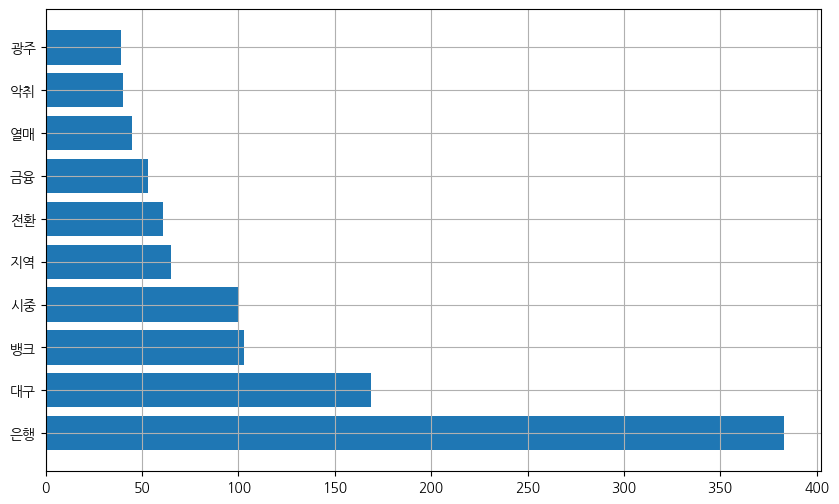

In [140]:
#!pip install koreanize-matplotlib
plt.figure(figsize=(10, 6))
plt.barh(df_d_top10_df['단어'], df_d_top10_df['빈도'])
plt.grid()
plt.show()

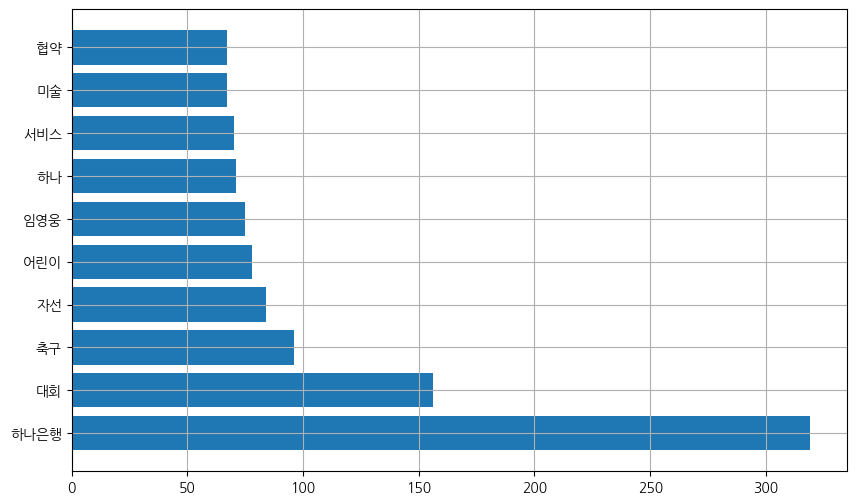

In [142]:
plt.figure(figsize=(10, 6))
plt.barh(df_h_top10_df['단어'], df_h_top10_df['빈도'])
plt.grid()
plt.show()

### 워드클라우드

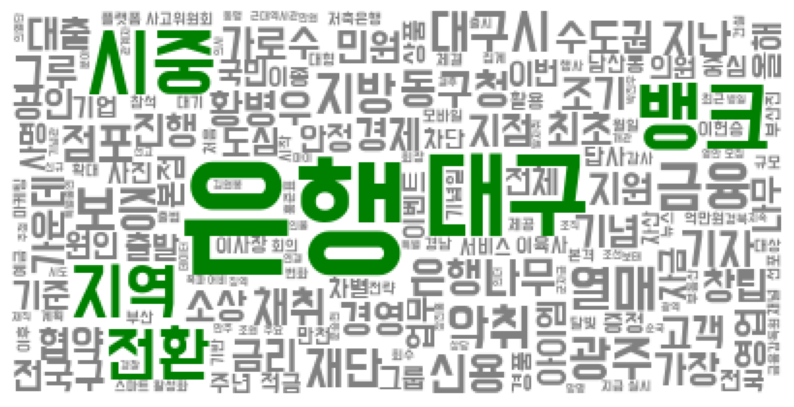

In [151]:
def custom_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    if df_d_counter[word] >= df_d_quantile:
        return "green"  
    else:
        return "gray"  

df_d_quantile = pd.Series(df_d_counter.values()).quantile(0.99)  
wc_d = WordCloud(
    background_color="white",
    font_path="BMDOHYEON_ttf.ttf",
).generate_from_frequencies(df_d_counter)

wc_d.recolor(color_func=custom_color_func)

plt.figure(figsize=(10, 6))
plt.imshow(wc_d)
plt.axis("off")
plt.show()

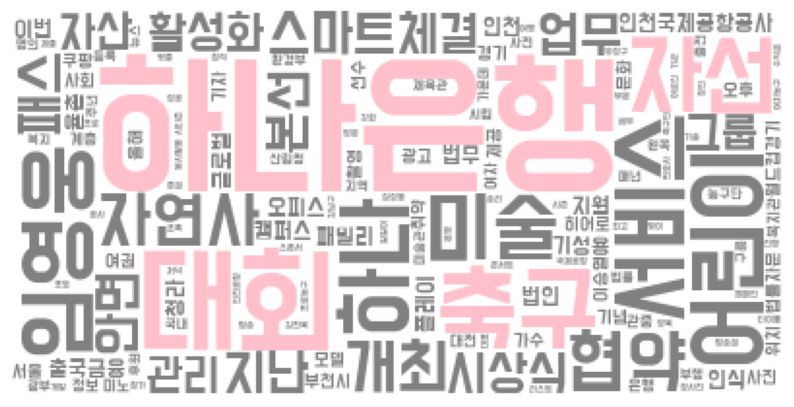

In [153]:
df_h_quantile = pd.Series(df_h_counter.values()).quantile(0.99)  
wc_h = WordCloud(
    background_color="white",
    font_path="BMDOHYEON_ttf.ttf",
).generate_from_frequencies(df_h_counter)

def custom_color_func_h(word, font_size, position, orientation, random_state=None, **kwargs):
    if df_h_counter[word] >= df_h_quantile:
        return "pink" 
    else:
        return "gray" 

wc_h.recolor(color_func=custom_color_func_h)

plt.figure(figsize=(10, 6))
plt.imshow(wc_h)
plt.axis("off")
plt.show()